In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
from sklearn import metrics
from itertools import cycle

In [2]:
df = pd.read_csv("boston_marathon_2014.csv",encoding='ISO-8859-15')

# Replace some random string values.
df = df.replace(to_replace='-', value=0)

df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [3]:
df

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [4]:
# Count nulls 
null_count = df.isnull().sum()
data = null_count[null_count>0]
print(data)

ctz      30740
state     2576
city         1
dtype: int64


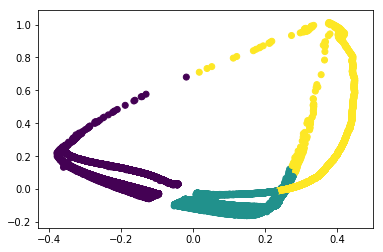

Comparing k-means clusters against the data:
col_0      0      1
row_0              
0      14330      0
1          0  14378
2         37   3239


In [5]:
# Binarize y so that 1 means male and 0 means female.
y = np.where(df['gender'] == "F", 0, 1)

# Break into a set of features and a variable for the known outcome.
X = df.drop(['ctz','state','bib','city','country','gender','name'],axis=1)

# Normalize
X_norm = normalize(X)

# Create the four-feature PCA.
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_norm)

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.5,
    random_state=42)

# Calculate predicted values using 3 clusters
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [6]:
# Each batch will be made up of 500 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=500)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))


Comparing k-means and mini batch k-means solutions:
col_0      0      1     2
row_0                    
0          0    206  3276
1      14330      0     0
2          0  14172     0


Number of estimated clusters: 7


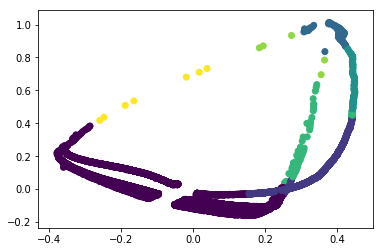

Comparing the assigned categories to the ones in the data:
col_0     0     1   2   3   4  5  6
row_0                              
0      7128     0  12   0   0  3  7
1      6931  1691  60  81  77  2  0


In [7]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

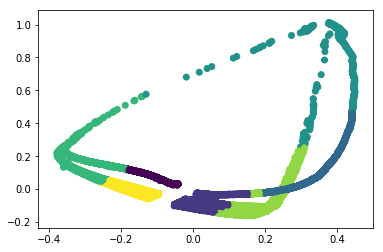

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      5014     0
1         0  9319
2         0  3118
3        39   320
4      2764     0
5         0  4860
6      6550     0


In [8]:
# So, let's try 7 clusters for k-means, then.
# Calculate predicted values.
y_pred = KMeans(n_clusters=7, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [9]:
# Now let's try mini batch at 7

# Each batch will be made up of 500 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=7,
    batch_size=500)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))


Comparing k-means and mini batch k-means solutions:
col_0     0     1     2    3     4     5     6
row_0                                         
0        39  2366   195    0     0   190     0
1         0  5699     0    0     0   175     0
2         0     0     6  359     3     0     0
3         0     0  2917    0     0     0     0
4      4975     0     0    0  2761     0  3180
5         0     0     0    0     0  4495     0
6         0  1254     0    0     0     0  3370


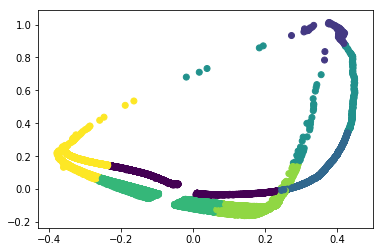

Comparing the assigned categories to the ones in the data:
col_0     0   1     2    3     4     5    6
row_0                                      
0      2798  13     0    5  3361     0  973
1      1396  58  1378  187  3265  2558    0


In [10]:
from sklearn.cluster import SpectralClustering

# We know we're looking for seven clusters.
n_clusters=7

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [11]:
# takes a really long time and the results are bad

# Note need to reduce training size because affinity method is timing out

# Reduce training size
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.9,
    random_state=42)


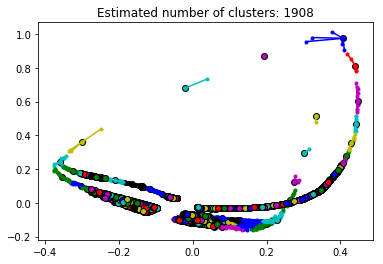

In [12]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Conclusion

Clustering methods are not good ways to predict the gender of finishers based on the various times
from the marathon and other races.

The higher the number of clusters used, the better the outcome, but the longer the run-time.

Spectral and affinity clustering produce no better results and take much longer to run.

The affinity clustering picture is worth 1000 words...
Each cluster consists of very few data points -- often only one datapoint.
No real clusters.